In [3]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

4. Considerando el archivo de datos p8-chalets.csv se pide:

 a)Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de
 correlación entre las variables a partir de estos gráficos.

 b)Calcular la matriz de covarianzas.

 c)A partir de lo observado, resulta razonable pensar en un análisis de componentes principales
 para reducir la dimensión del problema?

d) Hallar la primera componente principal.

 e) Indicar qué porcentaje de variabilidad total logra explicar esta componente

In [4]:
Dir = "/Users/Usuario/Documents/EXACTAS/DATOS/2do Año/Labo de Datos/LDD/DATASETS LDD/"

In [5]:
chalets = pd.read_csv(Dir + 'p8-chalets.csv')

In [6]:
chalets.columns

Index(['Promotora', 'DuracionHipoteca', 'PrecioMedio', 'SuperficieCocina'], dtype='object')

In [7]:
chalets.columns = chalets.columns.str.strip()
chalets.columns

Index(['Promotora', 'DuracionHipoteca', 'PrecioMedio', 'SuperficieCocina'], dtype='object')

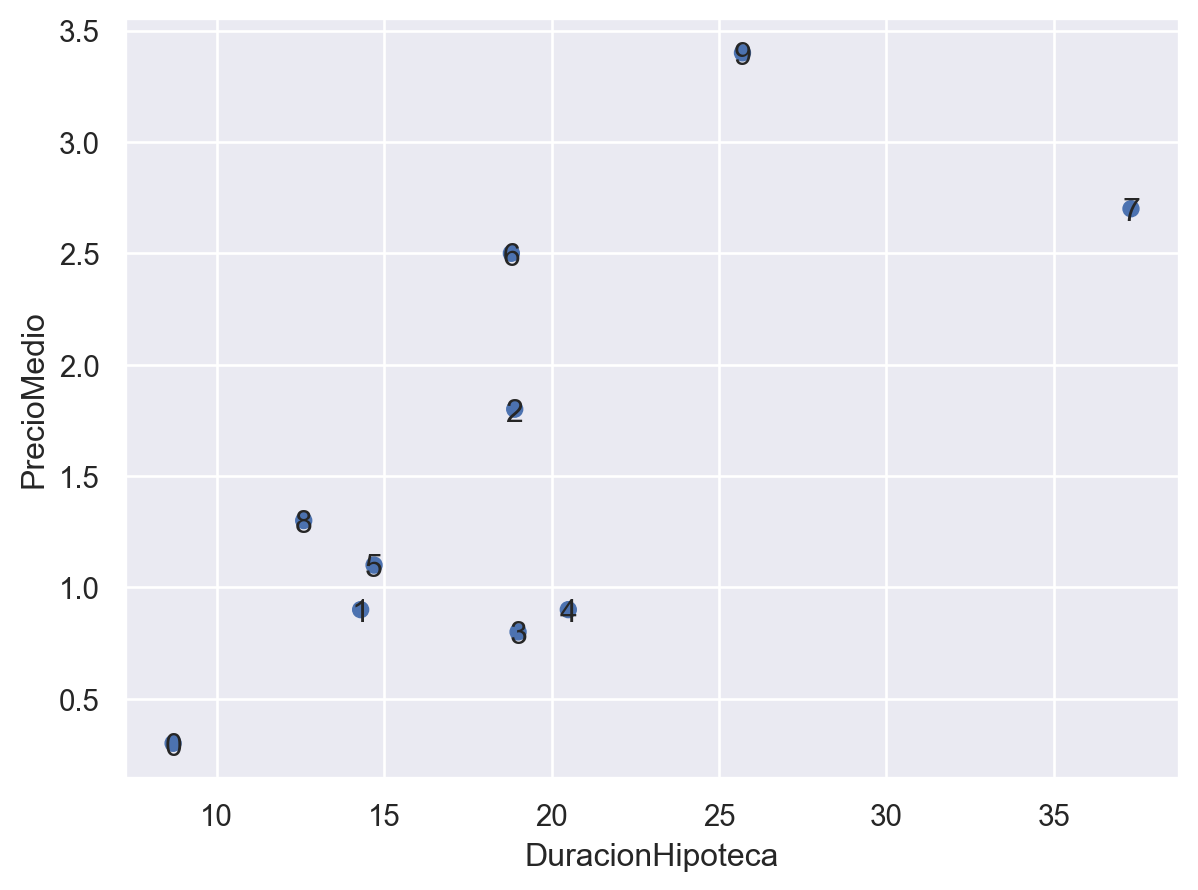

In [8]:
(
    so.Plot(data = chalets, x = "DuracionHipoteca", y = "PrecioMedio", text = chalets.index)
    .add(so.Dot())
    .add(so.Text())
)

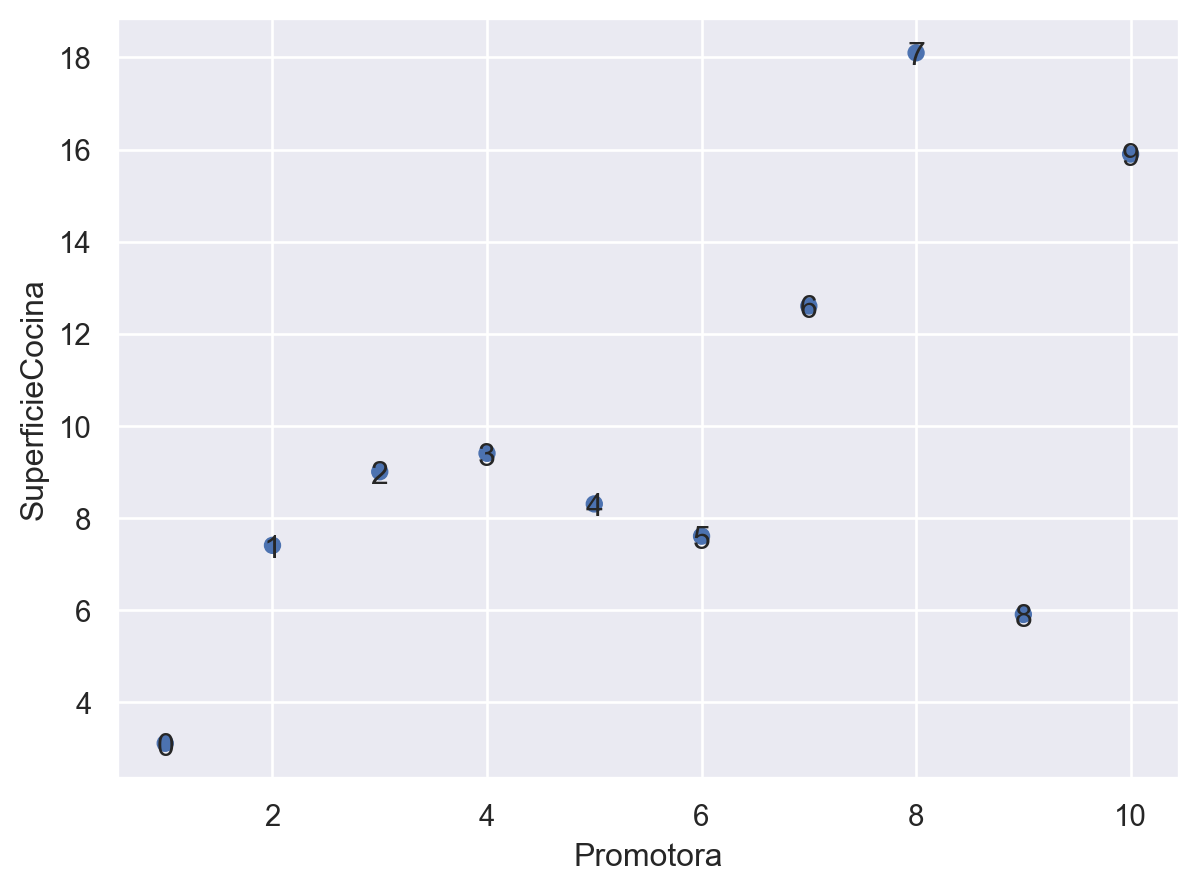

In [9]:
(
    so.Plot(data = chalets, x = "Promotora", y = "SuperficieCocina", text = chalets.index)
    .add(so.Dot())
    .add(so.Text())
)

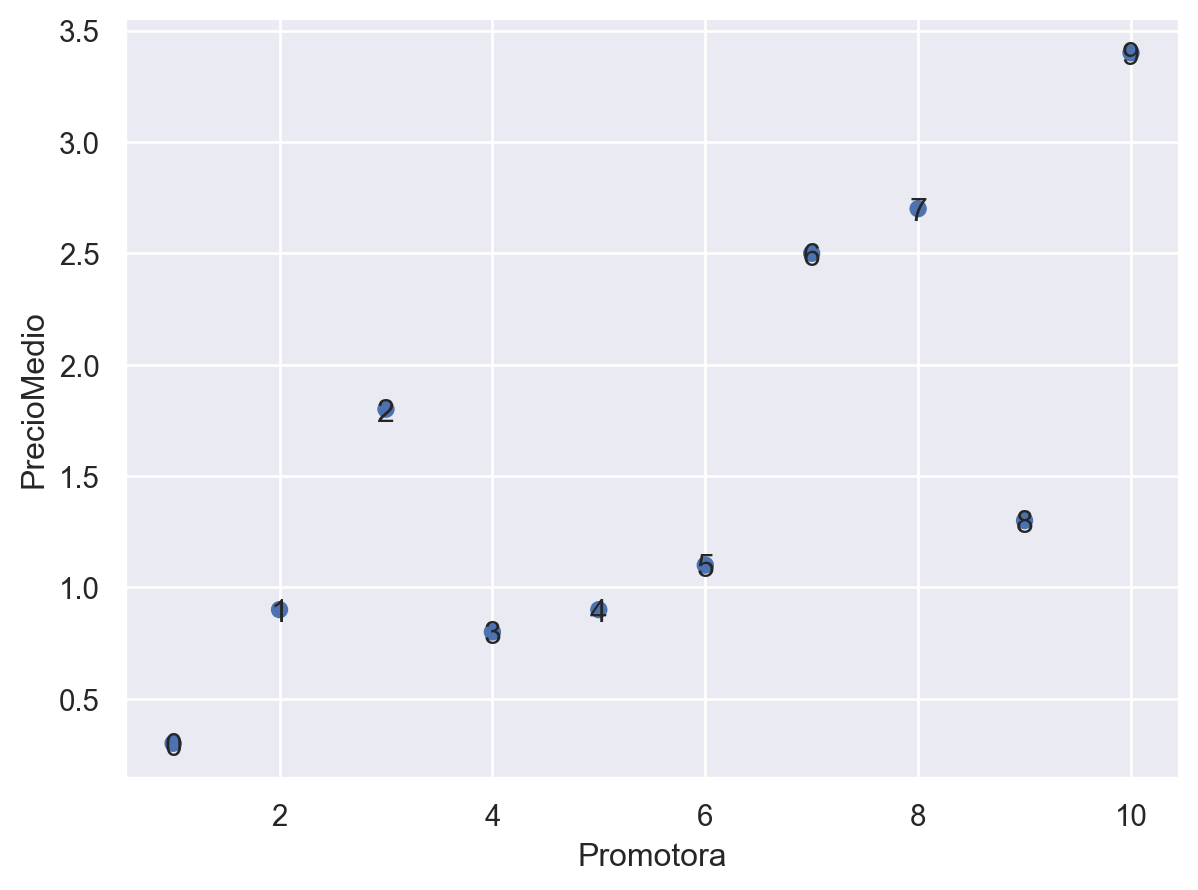

In [10]:
(
    so.Plot(data = chalets, x = "Promotora", y = "PrecioMedio", text = chalets.index)
    .add(so.Dot())
    .add(so.Text())
)

In [11]:
X_star = StandardScaler().set_output(transform="pandas").fit_transform(chalets)
display(X_star)

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,-1.566699,-1.371270,-1.343107,-1.530558
1,-1.218544,-0.629327,-0.708568,-0.537888
2,-0.870388,-0.019873,0.243240,-0.168523
3,-0.522233,-0.006624,-0.814325,-0.076182
4,-0.174078,0.192110,-0.708568,-0.330120
5,0.174078,-0.576331,-0.497055,-0.491718
6,0.522233,-0.033122,0.983535,0.662549
7,0.870388,2.417940,1.195048,1.932242
8,1.218544,-0.854560,-0.285542,-0.884168
9,1.566699,0.881058,1.935343,1.424365


In [12]:
X_star_t = np.transpose(X_star)
N = len(X_star)
Sigma = (X_star_t @ X_star) / N
display(Sigma)

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
Promotora,1.000000,0.522850,0.745598,0.639366
DuracionHipoteca,0.522850,1.000000,0.724473,0.932176
PrecioMedio,0.745598,0.724473,1.000000,0.890607
SuperficieCocina,0.639366,0.932176,0.890607,1.000000


In [13]:
gamma, U = np.linalg.eigh(Sigma)  # Usamos eigh porque A es simétrica. Podemos usar eig también
display(gamma)
display(U)

array([0.020565  , 0.19168767, 0.54489966, 3.24284767])

array([[ 0.04010157,  0.44627764, -0.77727566, -0.44166807],
       [-0.48121959,  0.48663073,  0.53565518, -0.49466329],
       [-0.38828412, -0.74522343, -0.15227077, -0.52027983],
       [ 0.78489172, -0.09310661,  0.29279633, -0.53809521]])

In [14]:
gamma = np.flip(gamma)
U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print (gamma)
print(U)

[3.24284767 0.54489966 0.19168767 0.020565  ]
[[-0.44166807 -0.77727566  0.44627764  0.04010157]
 [-0.49466329  0.53565518  0.48663073 -0.48121959]
 [-0.52027983 -0.15227077 -0.74522343 -0.38828412]
 [-0.53809521  0.29279633 -0.09310661  0.78489172]]


In [15]:
Z = X_star @ U 
Z.columns = ["Z" + str(i) for i in range(1,5)]  # Renombramos las columnas
display(Z)

,Z1,Z2,Z3,Z4
0,2.892655,0.239603,-0.223065,-0.082760
1,1.507586,0.560445,-0.271936,0.106921
2,0.358382,0.579505,-0.563683,-0.252059
3,0.698600,0.504063,0.377662,0.238641
4,0.528145,0.249447,0.574578,-0.083411
5,0.731404,-0.512307,0.213426,0.091376
6,-1.082497,-0.379433,-0.577699,0.175020
7,-3.241979,1.002433,0.494596,-0.076073
8,0.508856,-1.620295,0.423069,-0.123008
9,-2.901152,-0.623461,-0.446949,0.005354


In [16]:
#Autovalores
gamma

array([3.24284767, 0.54489966, 0.19168767, 0.020565  ])

In [17]:
total = 0
for autovalor in gamma:
    total += autovalor

total

4.000000000000001

In [18]:
porcentaje = 0

for autovalor in gamma:
    porcentaje = autovalor / total
    print (porcentaje)



0.8107119167334245
0.136224916076292
0.04792191819715885
0.005141248993124672


In [19]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X_star)
print(principalComponents)

[[-2.89265502 -0.23960343  0.22306481  0.08275987]
 [-1.50758556 -0.56044468  0.27193582 -0.10692068]
 [-0.35838196 -0.57950508  0.56368333  0.25205886]
 [-0.69860025 -0.50406271 -0.37766238 -0.23864057]
 [-0.52814459 -0.24944745 -0.57457792  0.08341083]
 [-0.73140395  0.51230701 -0.21342616 -0.09137615]
 [ 1.08249714  0.37943293  0.57769867 -0.1750197 ]
 [ 3.2419785  -1.00243287 -0.49459623  0.07607325]
 [-0.50885611  1.62029495 -0.42306867  0.12300842]
 [ 2.9011518   0.62346132  0.44694872 -0.00535414]]


In [20]:
pca.components_ 

array([[ 0.44166807,  0.49466329,  0.52027983,  0.53809521],
       [ 0.77727566, -0.53565518,  0.15227077, -0.29279633],
       [-0.44627764, -0.48663073,  0.74522343,  0.09310661],
       [-0.04010157,  0.48121959,  0.38828412, -0.78489172]])